In [106]:
import numpy as np

In [45]:
# load data
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

# data exploration

1. is there any preprocessing? I.e. capping and flooring? If your target is preprocessed, you need to consider what to do with it.
2. could there be any data errors?
3. if faetures are of different scales, we might need to scale them based on the algorithm and regularization you are using.
4. is there any missing values?
5. distribution. some algorithm prefer bell-shaped distribution of features, and we need to transform some features to be more bell-shaped. tree based models are also impacted by the distribution of feature variables.
   
>Tree-based models, including XGBoost, are generally robust to the distribution of feature variables compared to some other types of models, like linear regression. This robustness stems from their ability to handle various types of data (numerical, categorical, etc.) and their insensitivity to monotonic transformations of the features. However, there are still some aspects of feature variable distribution that can impact the performance of tree-based models:
> - Skewed features: Highly skewed features can affect the model's ability to split the data effectively. If a feature has a long tail or a few extreme values, the model might place splits that don't effectively partition the data.
>      - Fix: Apply transformations such as log, square root, or Box-Cox to normalize skewed features.
> - Outliers: Extreme values or outliers in the feature space can lead to suboptimal splits and overfitting to these rare events.
>      - Fix: Identify and handle outliers by removing them, capping them, or applying robust scaling techniques. Detect and handle outliers using techniques such as IQR (Interquartile Range) filtering, z-score thresholding
> - Feature Scaling: Although tree-based models do not require features to be on the same scale, large disparities in feature magnitudes can affect the learning process, especially when using certain regularization techniques or gradient boosting with a high learning rate.
>      - Fix: Standardize or normalize features if there is a large disparity in feature scales, although this is less critical for tree-based models than for models like SVM or k-NN.
> - Sparse Features: Features with many zero values (sparse features) can lead to inefficiencies in tree construction and might cause the model to miss important interactions.
>      - Fix: Ensure proper handling of sparse features and consider feature engineering to consolidate sparse features if necessary.

6. are there any outliers?

In [46]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [47]:
# numeric
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [48]:
# categorical
housing.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

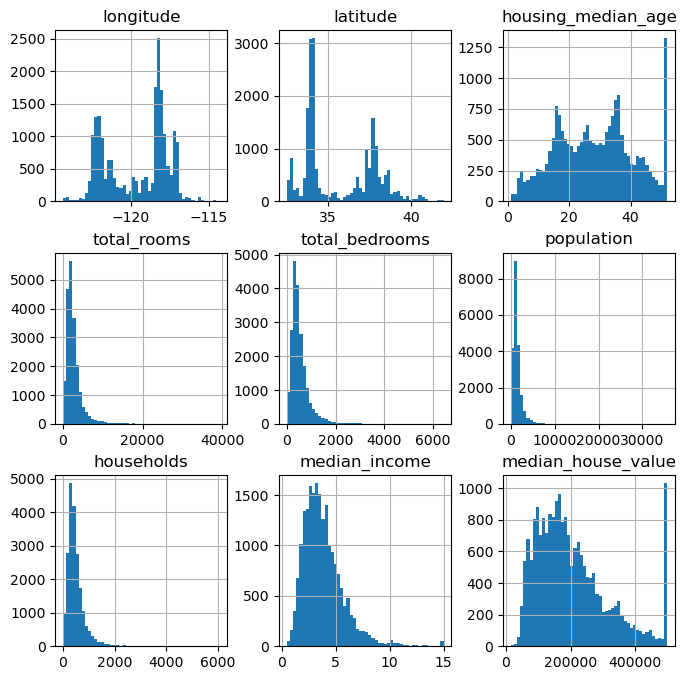

In [49]:
# histogram
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(8,8))
plt.show()

# create test set

stratefied sampling the test set when needed by target (for numeric target, can bin it first then statify sampling)

In [50]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(housing, test_size=0.2, random_state=1) # stratify=pandas.series(column)

In [52]:
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15961,-118.13,34.04,42.0,2205.0,451.0,1392.0,423.0,4.3646,211400.0,<1H OCEAN
1771,-117.15,32.92,16.0,2969.0,514.0,1594.0,465.0,4.5221,168300.0,<1H OCEAN
16414,-122.66,38.46,14.0,2364.0,631.0,1300.0,625.0,2.6023,221100.0,<1H OCEAN
5056,-118.28,33.97,38.0,1819.0,497.0,2110.0,499.0,1.6027,97300.0,<1H OCEAN
8589,-118.08,33.93,39.0,859.0,164.0,673.0,172.0,3.7143,158200.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10955,-122.53,37.63,27.0,2589.0,658.0,1386.0,608.0,2.9087,228200.0,NEAR OCEAN
17289,-122.27,37.88,44.0,2252.0,592.0,989.0,550.0,3.0132,272900.0,NEAR BAY
5192,-117.93,33.67,27.0,3512.0,472.0,1391.0,481.0,8.1001,336500.0,<1H OCEAN
12172,-117.78,34.13,18.0,7798.0,1161.0,3710.0,1227.0,5.8819,260500.0,INLAND


In [127]:
housing_labels = train["median_house_value"].copy()
housing = train.copy().drop(['median_house_value'], axis=1)

# data insights

1. using training set only
2. downsample if needed to faster manipulation
3. from pandas.plotting import scatter_matrix

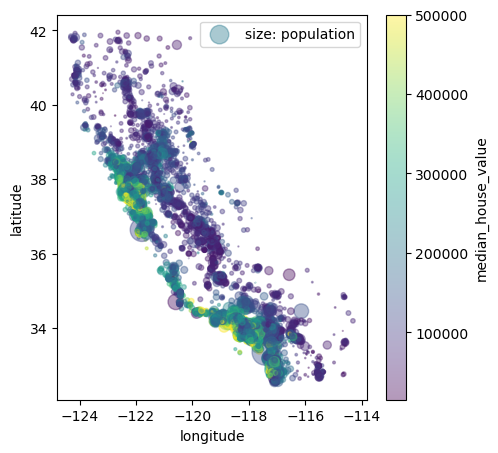

In [53]:
# visualize geographic data
train.plot(kind="scatter", x = "longitude", y="latitude",
            s=train["population"]/100, label="size: population",
            c='median_house_value', colorbar=True,
            alpha=0.4,
            figsize=(5,5))
plt.show()

In [54]:
# correlation
corrmatrix = train.corr(numeric_only=True)

In [55]:
corrmatrix['median_house_value'].sort_values() # can only tell linear relation

latitude             -0.140612
longitude            -0.050353
population           -0.024052
total_bedrooms        0.050191
households            0.067301
housing_median_age    0.106150
total_rooms           0.135334
median_income         0.688893
median_house_value    1.000000
Name: median_house_value, dtype: float64

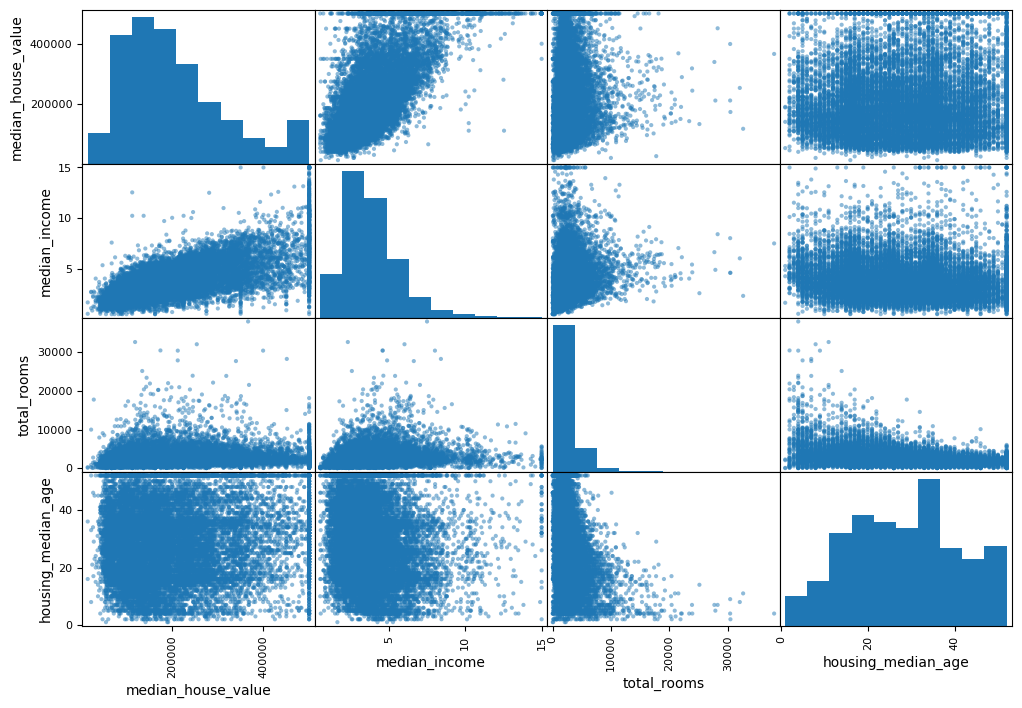

In [56]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(train[attributes], figsize=(12, 8))
plt.show()

# experimenting with attribute combinations

1. create ratio
2. create trended features
3. iterative process, once you have model outcome analysis and more insights, you can come back

In [57]:
train["rooms_per_house"] = train["total_rooms"] / train["households"]
train["bedrooms_ratio"] = train["total_bedrooms"] / train["total_rooms"]
train["people_per_house"] = train["population"] / train["households"]

In [58]:
corr_matrix = train.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688893
rooms_per_house       0.170578
total_rooms           0.135334
housing_median_age    0.106150
households            0.067301
total_bedrooms        0.050191
people_per_house     -0.022675
population           -0.024052
longitude            -0.050353
latitude             -0.140612
bedrooms_ratio       -0.258498
Name: median_house_value, dtype: float64

# prepare data

1. create functions to automate. one benefit is that you can try out different combinations of data preparation to see which is best.
2. imputation, outlier(cap&floor), onehotencoding, scaling,
3. pipeline

In [64]:
train_y = train['median_house_value']
train_x = train.drop("median_house_value", axis=1)

## imputation

In [65]:
# imputation
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
train_x_num = train_x.drop("ocean_proximity", axis=1)
train_x_num = pd.DataFrame(imputer.fit_transform(train_x_num), columns = train_x_num.columns)

In [66]:
train_x_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   rooms_per_house     16512 non-null  float64
 9   bedrooms_ratio      16512 non-null  float64
 10  people_per_house    16512 non-null  float64
dtypes: float64(11)
memory usage: 1.4 MB


## onehotencoder

In [69]:
from sklearn.preprocessing import OneHotEncoder

In [74]:
train_x_cat = train_x[['ocean_proximity']]
cat_encoder=OneHotEncoder(sparse_output=False)
train_x_cat = cat_encoder.fit_transform(train_x_cat)

In [75]:
train_x_cat

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [77]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [79]:
train_x_cat=pd.DataFrame(train_x_cat, columns=cat_encoder.get_feature_names_out())

In [84]:
train_x_cat.shape

(16512, 5)

In [85]:
train_x_num.shape

(16512, 11)

In [90]:
train_x = pd.concat([train_x_num, train_x_cat], axis=1, ignore_index=False)

In [91]:
train_x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_ratio,people_per_house,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-118.13,34.04,42.0,2205.0,451.0,1392.0,423.0,4.3646,5.212766,0.204535,3.290780,1.0,0.0,0.0,0.0,0.0
1,-117.15,32.92,16.0,2969.0,514.0,1594.0,465.0,4.5221,6.384946,0.173122,3.427957,1.0,0.0,0.0,0.0,0.0
2,-122.66,38.46,14.0,2364.0,631.0,1300.0,625.0,2.6023,3.782400,0.266920,2.080000,1.0,0.0,0.0,0.0,0.0
3,-118.28,33.97,38.0,1819.0,497.0,2110.0,499.0,1.6027,3.645291,0.273227,4.228457,1.0,0.0,0.0,0.0,0.0
4,-118.08,33.93,39.0,859.0,164.0,673.0,172.0,3.7143,4.994186,0.190920,3.912791,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-122.53,37.63,27.0,2589.0,658.0,1386.0,608.0,2.9087,4.258224,0.254152,2.279605,0.0,0.0,0.0,0.0,1.0
16508,-122.27,37.88,44.0,2252.0,592.0,989.0,550.0,3.0132,4.094545,0.262877,1.798182,0.0,0.0,0.0,1.0,0.0
16509,-117.93,33.67,27.0,3512.0,472.0,1391.0,481.0,8.1001,7.301455,0.134396,2.891892,1.0,0.0,0.0,0.0,0.0
16510,-117.78,34.13,18.0,7798.0,1161.0,3710.0,1227.0,5.8819,6.355338,0.148884,3.023635,0.0,1.0,0.0,0.0,0.0


## outliers

In [92]:
# outliers
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(train_x)
#train_x = train_x.iloc[outlier_pred == 1]
#train_x = train_x.iloc[outlier_pred == 1]

In [98]:
sum(outlier_pred==-1)/train_x.shape[0]

0.133296996124031

## scaling & distribution transformation

tree based models can also be impacted by feature scales and distribution. I.e. regularizaion is impacted by scales, tree splits are impacted by distribution and outliers

- Scaling: normalization(minmaxscaling) VS. standardization: 
    1. standardization does not bound values to a specific range, which may be a problem for some algorithms (i.e. <span style="color:red">NN often expect an input value ranging from 0 to 1</span>)
    2.  <span style="color:red">but normalization is much more affected by outliers</span>

- Transformation
    - tweedie transformation: zero inflated right skewed or long tail data. compound of poisson and gamma distribution
    - rbf_kernel transformation: for multimodal distributions(with multiple peaks). you can add a feature for each model by applying rbf kernel to each mode, representing similarity with that mode. I.e. using clustering for some features and apply rbf kernel against the cluster centroids, see the custom transformation section. Mainly used in SVM and Gaussian Process Regression. used for linear non-separately feature space. map it to a higher dimension that is more separatable..
    - percentile transformation to get uniform distribution

In [100]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(train_x_num)

In [101]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(train_x_num)

## target variable transformation

target variable tranformation is very important since it will introduce bias/underfit. 

see feature transformation for possible transformation.

In [ ]:
from sklearn.linear_model import LinearRegression

# target transform
target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5]  # pretend this is new data

# transform back, inverse transform
scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [ ]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

## dimensionality reduction

Benefits of dimensionality reduction:
1. speed up training
2. <span style="color:red">improve model performance</span>: the more dimensions, the greater risk of overfitting. Since instances will be very far from each other in high-dimensional space. Prediction on new instances will need greater extrapolations. Also most real world high-dimensional datasets lie close to a much lower-dimensional subspace because features can be highly correlated and some features are almost constant. Data are not spread out uniformly across all dimensions.
3. easier for data visualization

Two approaches of dimensionality reduction:
1. projection
2. manifold learning: <span style="color:red">a low-dimensional manifold is low-dimensional space that can be bent and twisted in a higher-dimensional space</span>. Most real world high-dimensional datasets lie close to a much lower-dimensional manifold but there are exceptions. you need to find out by trial and error

## custom transformation

the more you automate/modularize your transformation, the more combination of transformation you can try.

- FunctionTransformer to automate simple function transformation
- you can add TransformerMinin as base class to get fit_transform()
- you can add BaseEstimator as base class to get 2 extra method, get_params() and set_params()

### FunctionTransformer to automate simple function transformation

In [108]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

In [ ]:
# rbf kernel on non normal distributed features
from sklearn.metrics.pairwise import rbf_kernel

rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

In [ ]:
# take ratio
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

### more complex transformation using BaseEstimator, TransformerMixin as base class

using kmeans clustering to do rbf kernel transformation

In [111]:
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

## transformation pipeline

see the [notebook](https://colab.research.google.com/github/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb#scrollTo=yZPrIRp5wr-r) for how to give transformed columns names

In [115]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer # [("name", pipeline or transformation, [columns
from sklearn.compose import make_column_selector

In [117]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())
    
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(20640, 25)

### visualize the pipeline

In [118]:
from sklearn import set_config

set_config(display='diagram')

preprocessing

ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                             SimpleImputer(strategy='median')),
                                            ('standardscaler',
                                             StandardScaler())]),
                  transformers=[('bedrooms',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out=<function ratio_name at 0x1486244a0>,
                                                                      func=<function column_ratio at 0...
                                 ['total_bedrooms', 'total_rooms', 'population',
                                  'households', 'median_income']),
                                ('geo', ClusterSimilarity(random_state=42),
                                 ['latitude', 'longitude']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x1484b6e90>)])

# model training

## errors on all training data

In [129]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression


lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x148...
                                                   'households',
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1484b6e90>)])),
                ('linearregression', LinearRegression())])

In [130]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing)
lin_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
lin_rmse

67748.51121022092

## cross validation

benefits:
- keep test data untouched at very last until you are ready to launch a model you are confident about
- evaluate models using out of training samples without touching test data set
- train model using all data and evaluate model using all data to have a more robust evaluation
- you can also measure standard deviation of model accuracy

sklearn cross validation is using utility function instead of loss/cost function.

In [131]:
from sklearn.model_selection import cross_val_score

lin_rmses = -cross_val_score(lin_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10) 
pd.Series(lin_rmses).describe()

count       10.000000
mean     68623.084442
std       2518.102371
min      63893.122739
25%      67443.749002
50%      69000.235441
75%      70079.959491
max      72722.762193
dtype: float64

### manual

In [ ]:
# sklearn cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict
cross_val_score(model, x, y, cv=3, scoring='accuracy')
cross_val_predict(model, x, y, cv=3)

# stratified sampling
from sklearn.model_selection import StratifiedKFold
skfolds = StratifiedKFold(n_split=3, random_State=42)

for train_idx, test_idx in skfolds.split(X_train, y_train):
    df_x_train, df_y_train, df_x_test, df_y_test

    clone_m = sklearn.base.clone(classifier)
    clone_m.fit(df_x_train, df_y_train)
    df_y_pred = clone_m.predict(df_x_test)

    # measure
    # accuracy: sum(df_y_pred==df_y_test)/len(y_test)
    
    tp = np.sum([1 if y_p[i]==1 and y_t[i]==1 else 0 for i in range(len(y_test))])
    tp = np.sum(np.all([y_p[i]==1,y_t[i]==1], axis=0))
    # precision(binary):
    tp/sum(y_pred)
    # recall
    tp/sum(y_test)

# self-implemented cross validation
np.random.choice(y,0.8*len(y), replace=False)
np.random.permutation(y, random_state)

## grid, random hyperparameter search

- combine cross validation with hyperparameter search
- you can make data preparation as one of the hyperparameter to find out the optimal combination
- benefits of random hyperparameter search
    - try more values of each hyperparameter
    - more control over the computing budget you want to allocate to hyperparameter search, by simply setting the number of iterations

#### grid search

In [132]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x1484b6e90>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [ ]:
# get all params
full_pipeline.get_params().keys()

In [ ]:
grid_search.best_params_

In [ ]:
# check the scores of each combination of hyperparameters
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

#### random search

specify distribution of hyperparameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_labels)

# evaluate model performance on Test

## regression

In [ ]:
final_predictions = final_model.predict(X_test)
squared_errors = (final_predictions - y_test) ** 2

### CI of error

In [ ]:
from scipy import stats

confidence = 0.95
m = len(squared_errors)
mean = squared_errors.mean()

# t(student) distribution for small samples
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

# normal distribution, z score for large samples
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

## classification

### Precision or Recall(TPR)

When False Positive cost is high, prefer higher precision: TP/(TP+FP)
When false negative cost is high, prefer higher recall(TPR): TP/(TP+FN)

Decide the optimal threshold based on precision recall curve and Precision VS. Recall curve: threshold on function scores(X.W)

In [ ]:
tp = np.sum([1 if y_p[i]==1 and y_t[i]==1 else 0 for i in range(len(y_test))])
tp = np.sum(np.all([y_p[i]==1,y_t[i]==1], axis=0))
# precision(binary):
tp/sum(y_pred)
# recall
tp/sum(y_test)

### ROC (TPR VS. FPR)

<span style="color:red">**when positive instances are rare or you care more about false positives than false negatives, PR curve is preferred than POC**</span>

# save model

In [ ]:
import joblib

joblib.dump(final_model, "my_california_housing_model.pkl")
final_model_reloaded = joblib.load("my_california_housing_model.pkl")